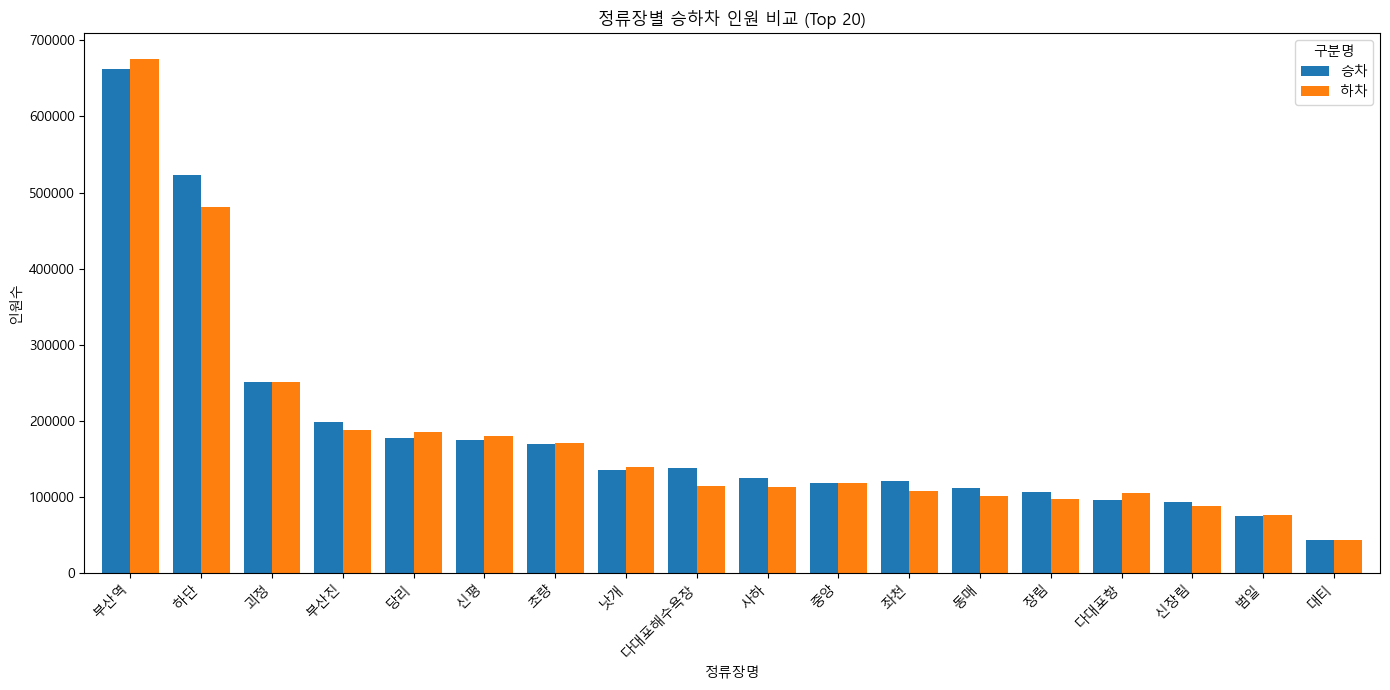

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 불러오기
df = pd.read_csv('busan-bus-data.csv')

# 승차/하차 인원 집계
summary = df.groupby(['역명', '구분명'])['총인원수'].sum().reset_index()

# 피벗 형태로 변경 → 정류장별 승차/하차를 나란히 보기
pivot_df = summary.pivot(index='역명', columns='구분명', values='총인원수').fillna(0)

# 승차 + 하차 합 기준으로 상위 20개 정류장 추출
pivot_df['총합'] = pivot_df['승차'] + pivot_df['하차']
top_20 = pivot_df.sort_values('총합', ascending=False).head(20)

# 시각화
top_20[['승차', '하차']].plot(kind='bar', figsize=(14, 7), width=0.8)
plt.title('정류장별 승하차 인원 비교 (Top 20)')
plt.xlabel('정류장명')
plt.ylabel('인원수')
plt.xticks(rotation=45, ha='right')
plt.legend(title='구분명')
plt.tight_layout()
plt.show()